In [1]:
from _element import feature_control as ft_c

In [2]:
from _element import calculations as calc

In [3]:
from _usecase import algorithm_prophet as prpt

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withobject.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)

In [9]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [10]:
y_col= df_raw.columns.values.tolist()

In [11]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [12]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [13]:
x_col= df_temp.columns.values.tolist()

In [14]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [15]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [16]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [18]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [19]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1622.85309867
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 45.7285186234
MAPE_div_std with segment 1041: 112.749670127
sMAPE of company code 1041: 12.9933624634
          ds   temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-01  17.299999      13.4          0.0  5619.534080  8615
1 2017-11-02  18.000000      14.0          1.6  5462.101313  6794
2 2017-11-03  15.700000       4.5          0.6  6477.728393  6946
3 2017-11-04  12.800000       3.2          0.0  4816.991527  4092
4 2017-11-05  14.200000       7.3          0.0  -664.683216     0


c:\Studying\Project_Nextop\nextop-engine\nextop_engine\_element\calculations.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1692: 2670.87532761
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 24.7759208074
MAPE_div_std with segment 1692: 84.3770829226
sMAPE of company code 1692: 7.81884863407
          ds   temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-01  17.299999      13.4          0.0  17038.279657  19275
1 2017-11-02  18.000000      14.0          1.6  16770.640498  19673
2 2017-11-03  15.700000       4.5          0.6  16843.474602  19659
3 2017-11-04  12.800000       3.2          0.0  10977.935315   8193
4 2017-11-05  14.200000       7.3          0.0   4719.808973      0


RMSE with segment 1815: 8014.49047709
MAPE with segment 1815: 2435.27859516
MAPE_with_std with segment 1815: 25.9837625847
MAPE_div_std with segment 1815: 76.3184869046
sMAPE of company code 1815: 4.72549906559
          ds   temp_max  temp_min  rain_amount          yhat   1815
0 2017-11-01  17.299999      13.4          0.0  76744.618155  75861
1 2017-11-02  18.000000      14.0       

In [20]:
y_col

[1041, 1692, 1815, 1853, 1878]

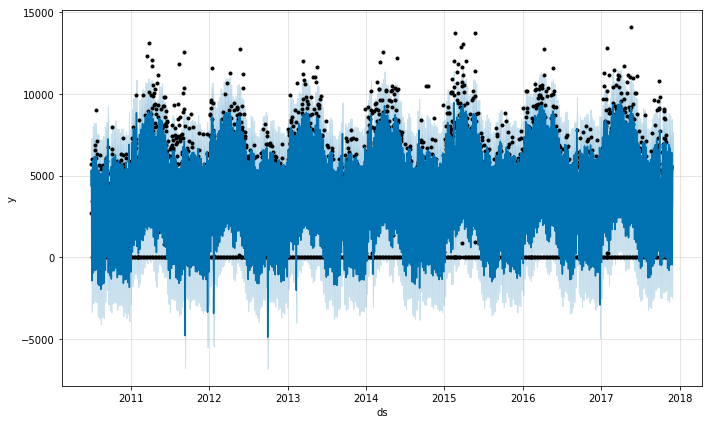

In [23]:
result_dict[1041]['model'].plot(result_dict[1041]['forecastProphetTable'])

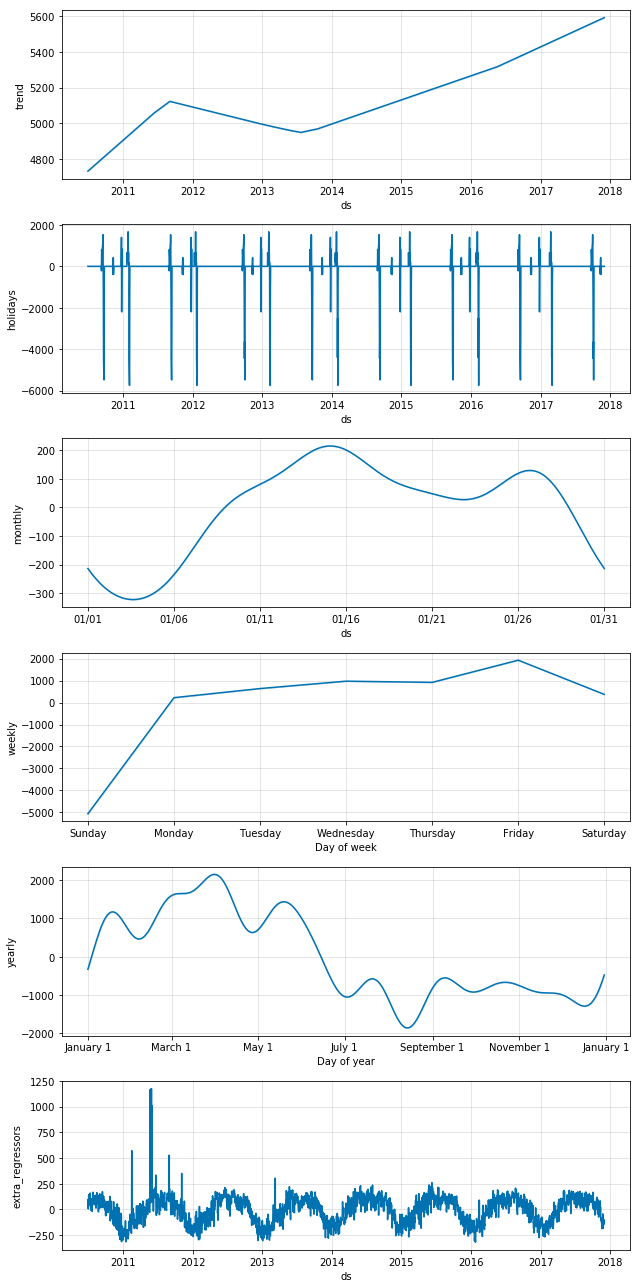

In [24]:
result_dict[1041]['model'].plot_components(result_dict[1041]['forecastProphetTable'])

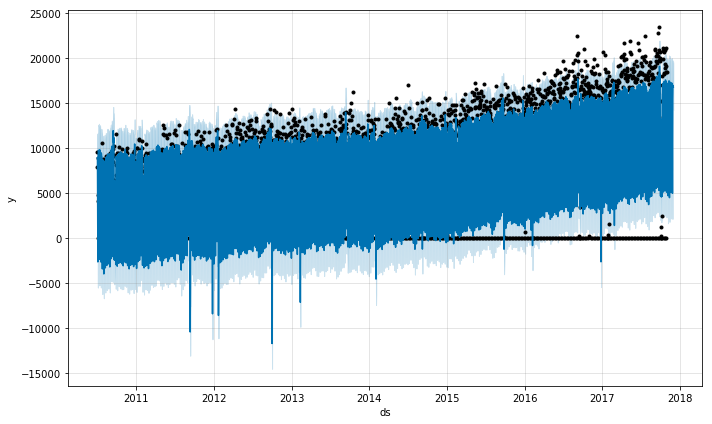

In [25]:
result_dict[1692]['model'].plot(result_dict[1692]['forecastProphetTable'])

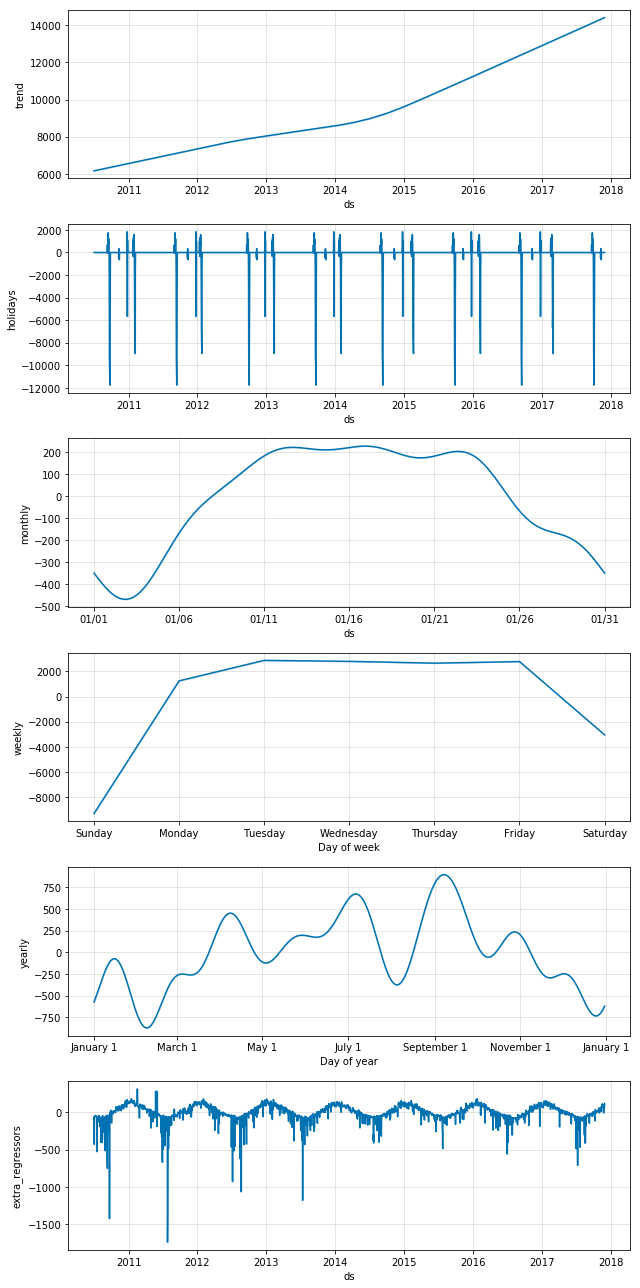

In [26]:
result_dict[1692]['model'].plot_components(result_dict[1692]['forecastProphetTable'])

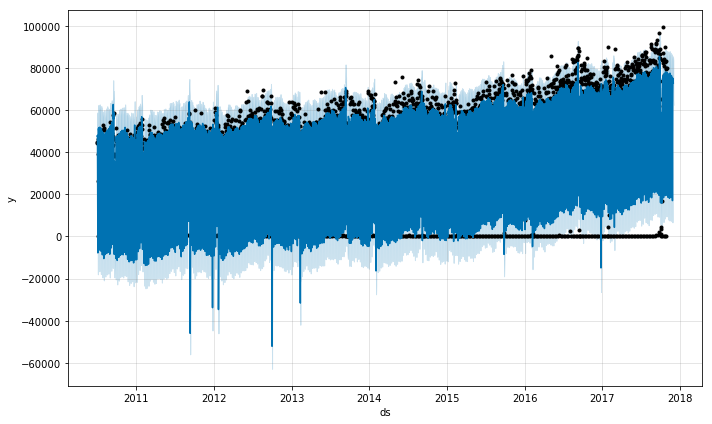

In [27]:
result_dict[1815]['model'].plot(result_dict[1815]['forecastProphetTable'])

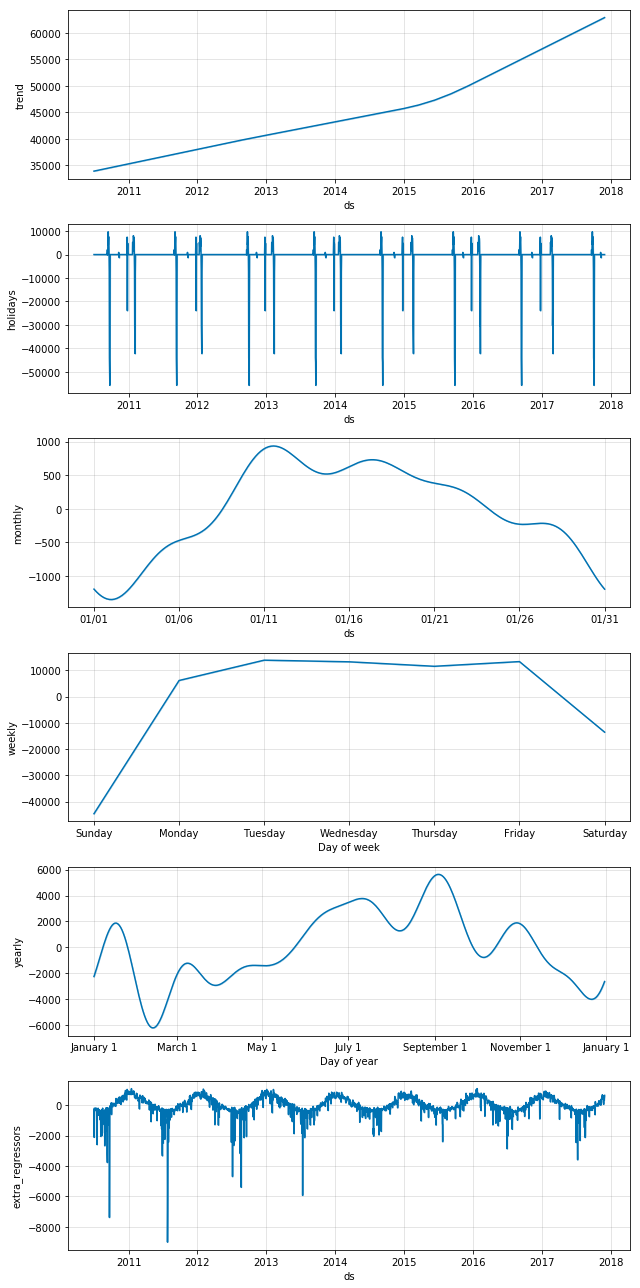

In [28]:
result_dict[1815]['model'].plot_components(result_dict[1815]['forecastProphetTable'])

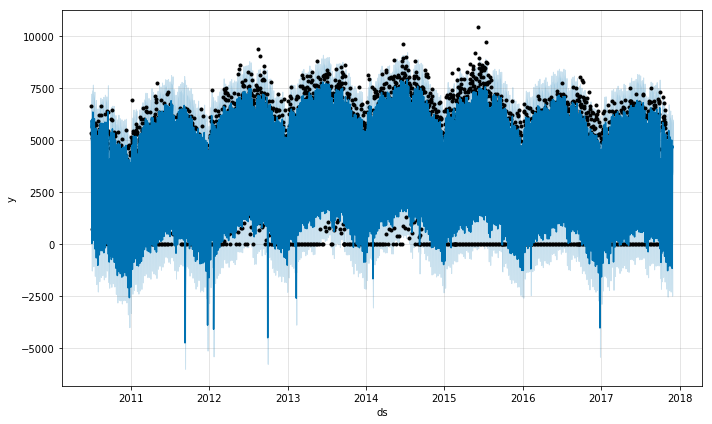

In [29]:
result_dict[1853]['model'].plot(result_dict[1853]['forecastProphetTable'])

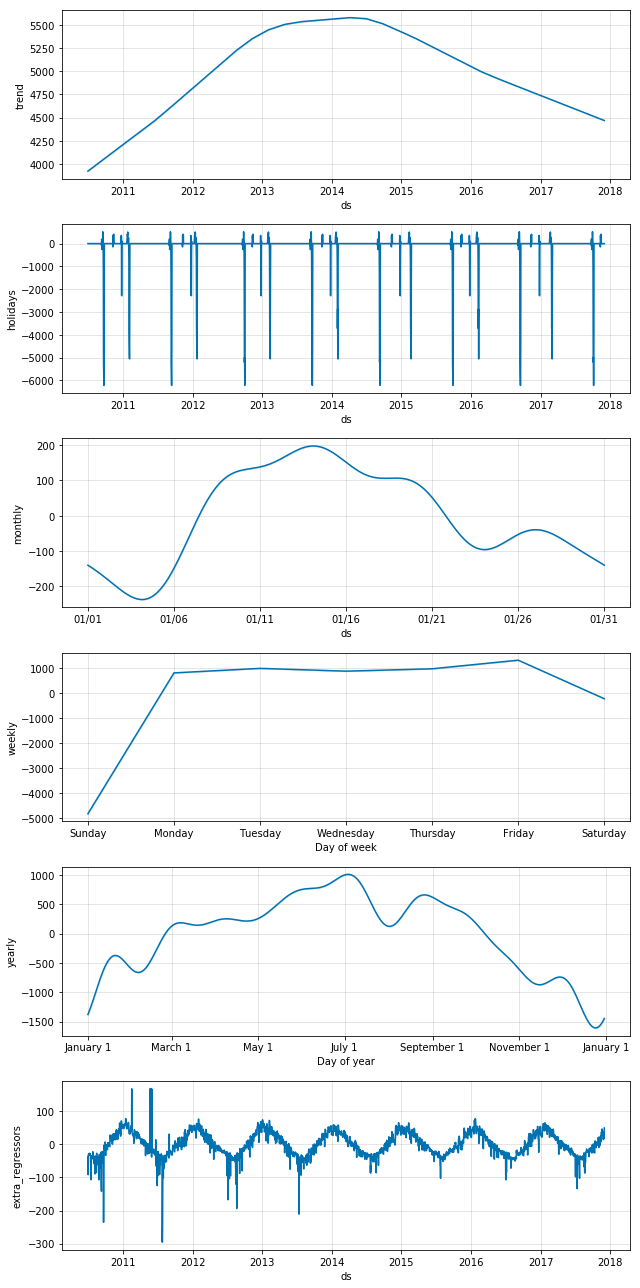

In [30]:
result_dict[1853]['model'].plot_components(result_dict[1853]['forecastProphetTable'])

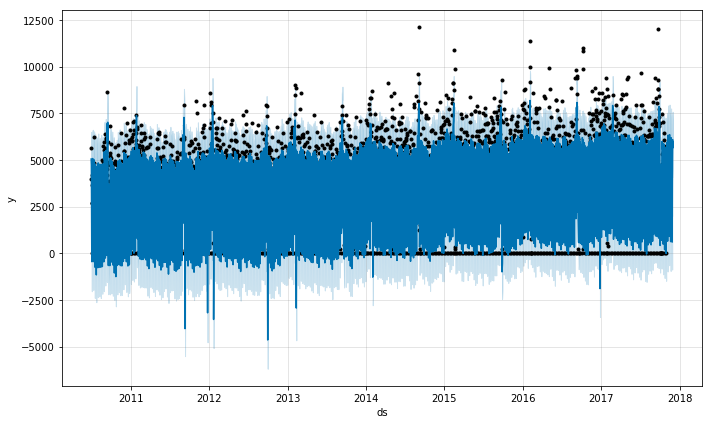

In [31]:
result_dict[1878]['model'].plot(result_dict[1878]['forecastProphetTable'])

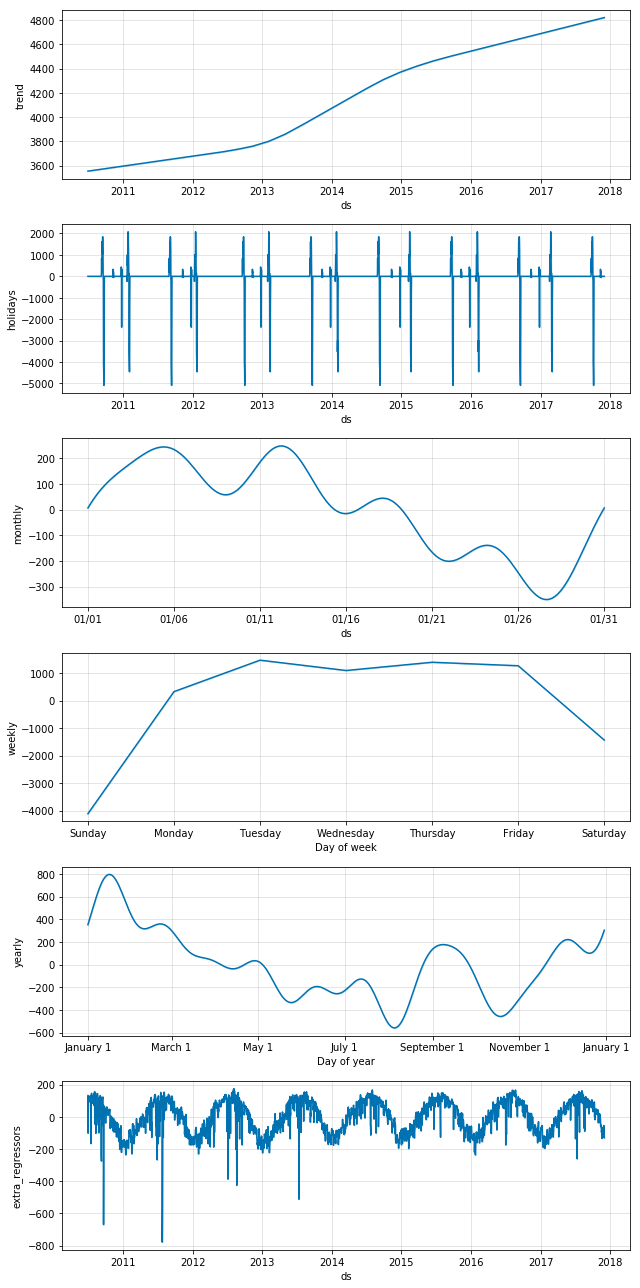

In [32]:
result_dict[1878]['model'].plot_components(result_dict[1878]['forecastProphetTable'])